 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("~/bootcamp2020/UNC-CHACC-FIN-PT-03-2020copy/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")


In [3]:
# Count nulls
whale_returns_df = pd.read_csv(whale_returns_csv, infer_datetime_format=True, parse_dates=True, index_col= 'Date')
whale_returns_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [4]:
# Drop nulls
whale_returns_df.isnull().sum()
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("~/bootcamp2020/UNC-CHACC-FIN-PT-03-2020copy/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, infer_datetime_format=True, parse_dates=True, index_col = 'Date')
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("~/bootcamp2020/UNC-CHACC-FIN-PT-03-2020copy/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv")
sp500_history_df= pd.read_csv(sp500_history_csv, infer_datetime_format=True, parse_dates=True, index_col = 'Date')

In [9]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types

sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df.head()
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')

In [11]:
# Calculate Daily Returns
pct_daily_return = sp500_history_df['Close'].pct_change()
sp500_history_df['pct_daily_return'] = pct_daily_return
sp500_history_df.head()

,Close,pct_daily_return
Date,,
2019-04-23,2933.68,NaN
2019-04-22,2907.97,-0.008764
2019-04-18,2905.03,-0.001011
2019-04-17,2900.45,-0.001577
2019-04-16,2907.06,0.002279


In [12]:
# Drop nulls
sp500_history_df.dropna(inplace= True)

In [13]:
# Rename Column
sp500_history_df.rename(columns={'pct_daily_return': 'pct_change'})
sp500_history_df.shape

(1648, 2)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFram
concat_data = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df['pct_daily_return']], axis=1)
concat_data.dropna(inplace=True)
concat_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,pct_daily_return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [15]:
concat_data2 = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis=1, )

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

In [16]:
concat_data2.index.year

Int64Index([2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='Date', length=1665)

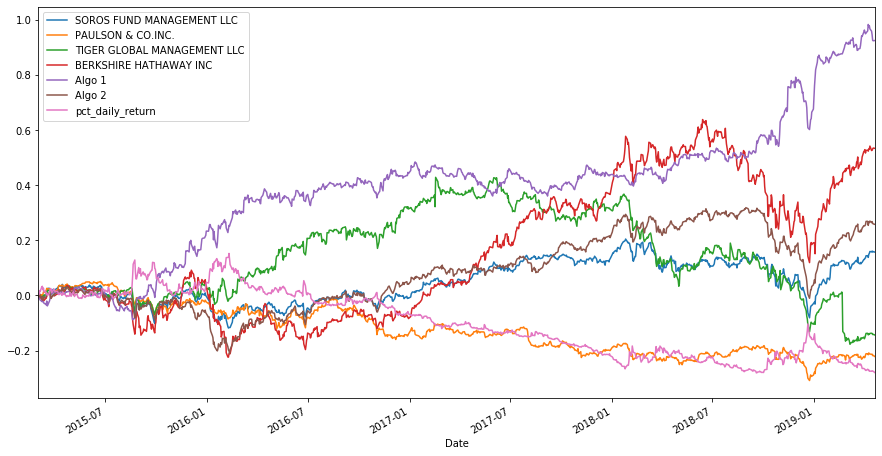

In [17]:
# Plot cumulative returns
cumulative_returns = (1 + concat_data).cumprod() - 1
cumulative_returns.plot(figsize =(15,8))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

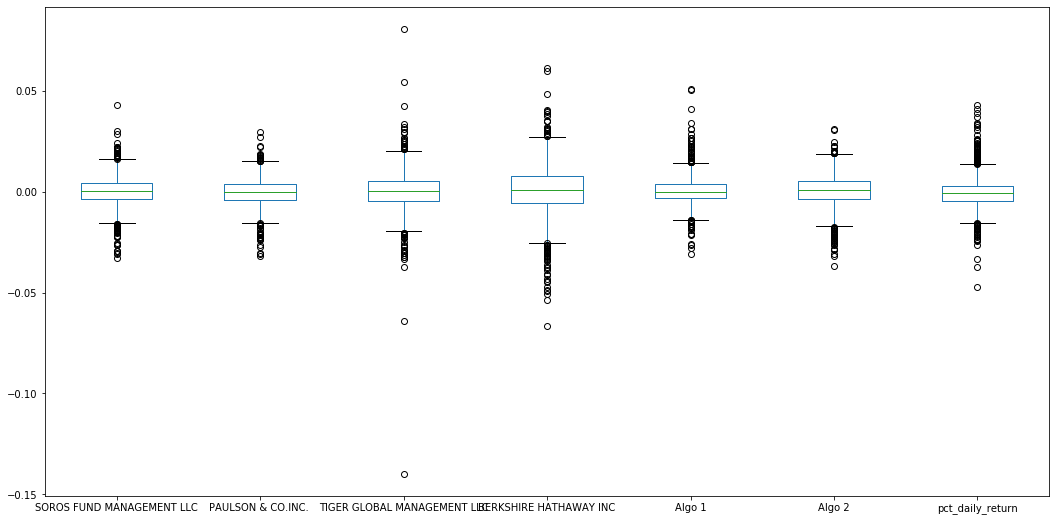

In [18]:
# Box plot to visually show risk
concat_data.plot.box(figsize=(18,9))

In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
daily_std = concat_data.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
pct_daily_return               0.008587
dtype: float64


In [20]:
# Determine which portfolios are riskier than the S&P 500
riskierthansp500 = daily_std[daily_std > daily_std['pct_daily_return']]
riskierthansp500

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
pct_daily_return               0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

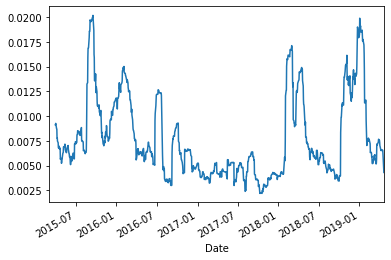

In [22]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
concat_data['pct_daily_return'].rolling(window=21).std().plot()

In [23]:
# Correlation
correlation = concat_data.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,pct_daily_return
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
pct_daily_return,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
algo_1_beta = concat_data['Algo 1'].cov(concat_data['pct_daily_return']) / concat_data['pct_daily_return'].var()
algo_1_beta

-0.030149214542337766

In [25]:
concat_data['pct_daily_return'].rename('sp500_pct_daily_return')
concat_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,pct_daily_return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [26]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [27]:
# Annualzied Sharpe Ratios
sharpe_ratios = (concat_data.mean() *252) / (concat_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
pct_daily_return              -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

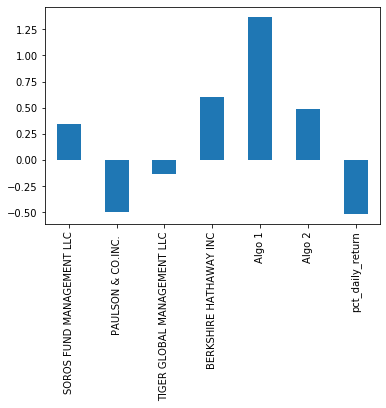

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
import pandas_datareader.data as web
end = dt.datetime.now()
start = dt.datetime(end.year - 5, end.month , end.day)
def get_stock_data(ticker):
    #return ((1 + web.DataReader(ticker, 'yahoo', start, end)['Close'].pct_change().dropna().sort_index()).cumprod()-1).reset_index().rename({'Close':ticker},axis=1)
    return web.DataReader(ticker, 'yahoo', start, end)



In [30]:
# Read the first stock
aapl_stock_df = get_stock_data('AAPL')
aapl_stock_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-17,129.619995,128.309998,129.080002,129.619995,46164700.0,119.458923
2015-07-20,132.970001,130.699997,130.970001,132.070007,58900200.0,121.716888
2015-07-21,132.919998,130.320007,132.850006,130.750000,76756400.0,120.500343
2015-07-22,125.500000,121.989998,121.989998,125.220001,115450600.0,115.403839
2015-07-23,127.089996,125.059998,126.199997,125.160004,50999500.0,115.348526


In [31]:
# Read the second stock
tsla_stock_df = get_stock_data("TSLA")

In [32]:
# Read the third stock
ual_stock_df  = get_stock_data("UAL")

In [33]:
# Concatenate all stocks into a single DataFrame
aapl_tsla_ualdf = pd.concat([aapl_stock_df, tsla_stock_df, ual_stock_df], axis=1)
stocks_pctchange = aapl_tsla_ualdf['Close'].pct_change()
stocks_pctchange.columns = ['aapl', 'tsla', 'ual']
pd.to_datetime(stocks_pctchange.index)
stocks_pctchange.head()

,aapl,tsla,ual
Date,,,
2015-07-17,NaN,NaN,NaN
2015-07-20,0.018901,0.027671,-0.000722
2015-07-21,-0.009995,-0.054879,0.011201
2015-07-22,-0.042294,0.004123,0.019653
2015-07-23,-0.000479,-0.002501,-0.007009


In [34]:
# Reset the index
stocks_pctchange.reset_index(inplace=True)

concat_data.reset_index(inplace=True)


In [35]:
concat_data.rename(columns= {'pct_daily_return':'sp500_pct_daily_change'}, inplace=True)


In [36]:
# Drop Nulls
stocks_pctchange.isnull().sum()
stocks_pctchange.dropna(inplace = True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
stocks_pctchange['portfolio_return'] = stocks_pctchange[['aapl', 'tsla', 'ual']].dot(weights)
stocks_pctchange.head()

,Date,aapl,tsla,ual,portfolio_return
1,2015-07-20,0.018901,0.027671,-0.000722,0.015283
2,2015-07-21,-0.009995,-0.054879,0.011201,-0.017891
3,2015-07-22,-0.042294,0.004123,0.019653,-0.006173
4,2015-07-23,-0.000479,-0.002501,-0.007009,-0.003330
5,2015-07-24,-0.005273,-0.006699,-0.003176,-0.005050


In [38]:
# concat_data.dtypes
# stocks_pctchange.dtypes

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
complete_df = concat_data.join(stocks_pctchange['portfolio_return'])
complete_df.dropna(inplace=True)
complete_df.set_index('Date', inplace=True)
complete_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_pct_daily_change,portfolio_return
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.015283
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,-0.017891
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.006173
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.003330
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921,-0.005050


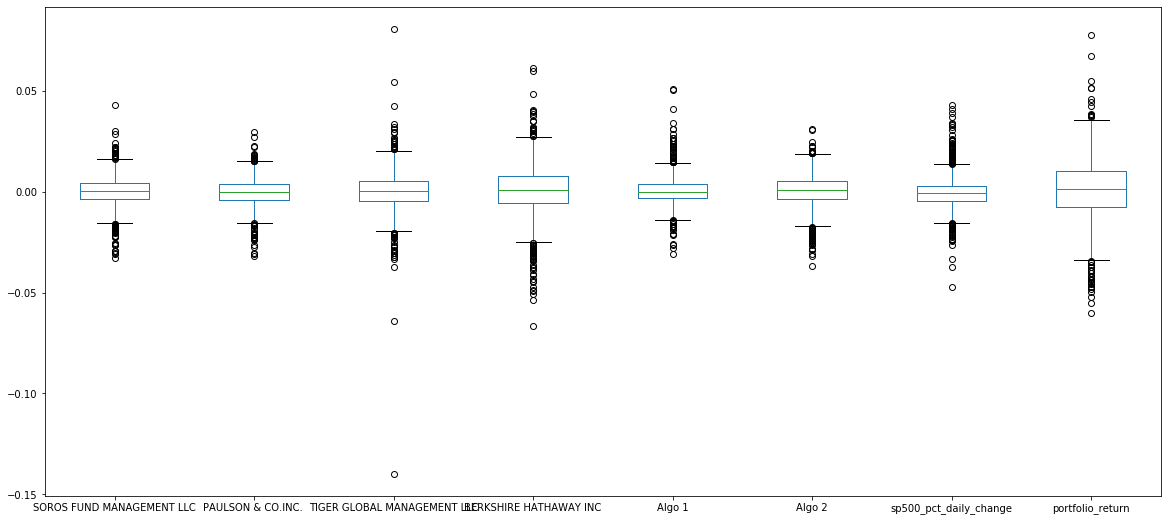

In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
complete_df.plot.box(figsize=(20,9))

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [41]:
# Risk
complete_df.std()


SOROS FUND MANAGEMENT LLC      0.007900
PAULSON & CO.INC.              0.007027
TIGER GLOBAL MANAGEMENT LLC    0.010903
BERKSHIRE HATHAWAY INC         0.012923
Algo 1                         0.007626
Algo 2                         0.008345
sp500_pct_daily_change         0.008590
portfolio_return               0.015837
dtype: float64

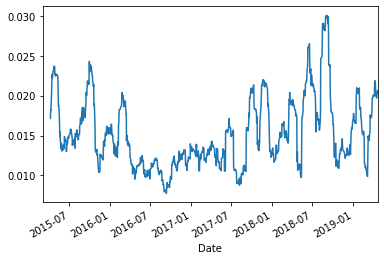

In [43]:
# Rolling
complete_df['portfolio_return'].rolling(window=25).std().plot()

In [47]:
# Beta
# cov / var
watchlist_return_cov = complete_df['portfolio_return'].cov(complete_df['sp500_pct_daily_change'])
watchlist_return_var = complete_df['portfolio_return'].var()

watchlist_beta= watchlist_return_cov/watchlist_return_var
watchlist_beta

-0.01027229246625589

In [52]:
# Annualzied Sharpe Ratios
new_sharpe = (complete_df.mean() *252) / (complete_df.std() * np.sqrt(252))
new_sharpe

SOROS FUND MANAGEMENT LLC      0.345506
PAULSON & CO.INC.             -0.480959
TIGER GLOBAL MANAGEMENT LLC   -0.129556
BERKSHIRE HATHAWAY INC         0.614872
Algo 1                         1.374206
Algo 2                         0.486307
sp500_pct_daily_change        -0.526730
portfolio_return               0.495097
dtype: float64

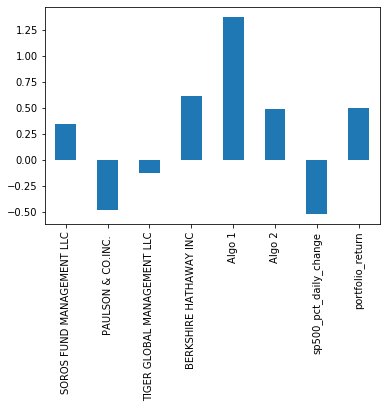

In [54]:
# Visualize the sharpe ratios as a bar plot
new_sharpe.plot.bar()

## Include correlation analysis to determine which stocks (if any) are correlated

In [55]:
# YOUR CODE HERE
complete_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_pct_daily_change,portfolio_return
SOROS FUND MANAGEMENT LLC,1.000000,0.699870,0.561043,0.754182,0.320864,0.826726,0.000669,0.041962
PAULSON & CO.INC.,0.699870,1.000000,0.434380,0.545294,0.268483,0.678147,0.013910,0.032189
TIGER GLOBAL MANAGEMENT LLC,0.561043,0.434380,1.000000,0.424166,0.164111,0.507161,-0.001485,0.014762
BERKSHIRE HATHAWAY INC,0.754182,0.545294,0.424166,1.000000,0.291557,0.687785,-0.013573,0.020811
Algo 1,0.320864,0.268483,0.164111,0.291557,1.000000,0.287823,-0.033790,-0.052574
Algo 2,0.826726,0.678147,0.507161,0.687785,0.287823,1.000000,-0.002116,0.036948
sp500_pct_daily_change,0.000669,0.013910,-0.001485,-0.013573,-0.033790,-0.002116,1.000000,-0.018939
portfolio_return,0.041962,0.032189,0.014762,0.020811,-0.052574,0.036948,-0.018939,1.000000
